Dataset shape: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  

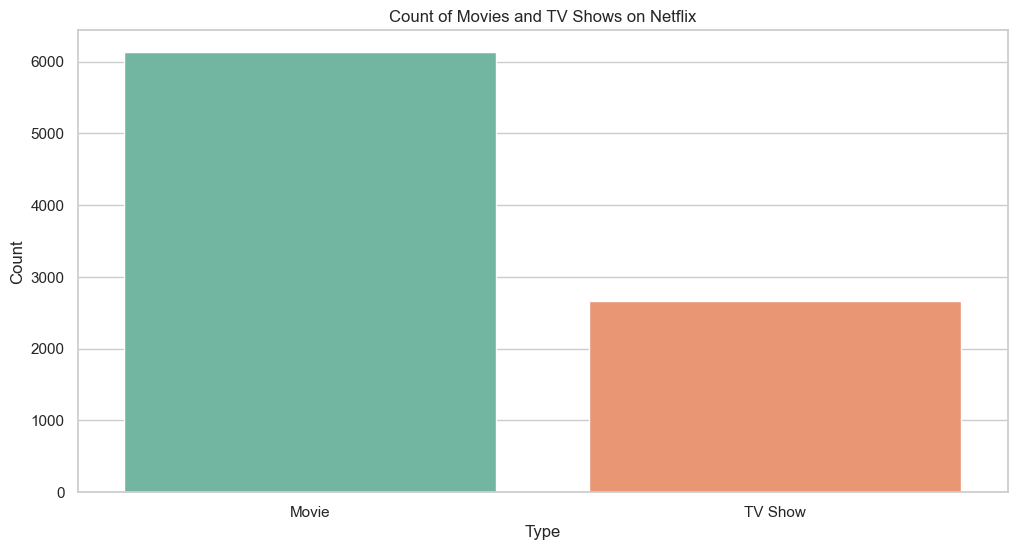

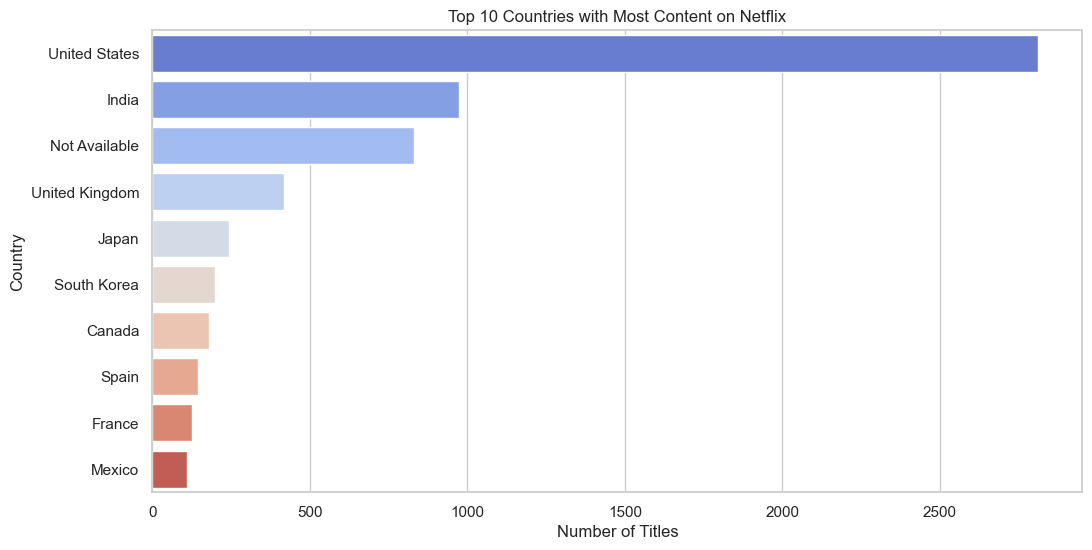

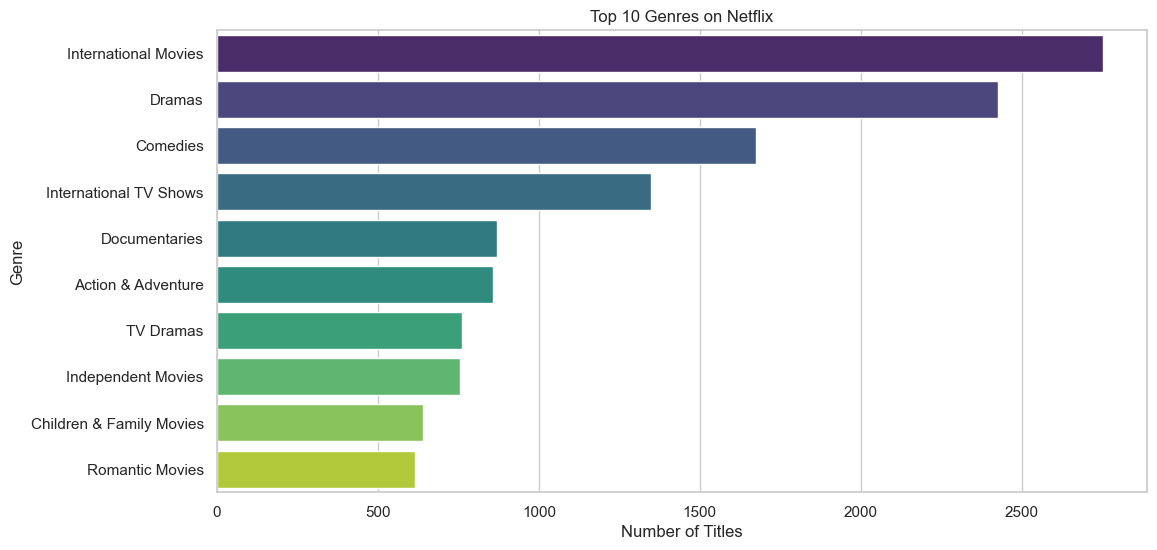

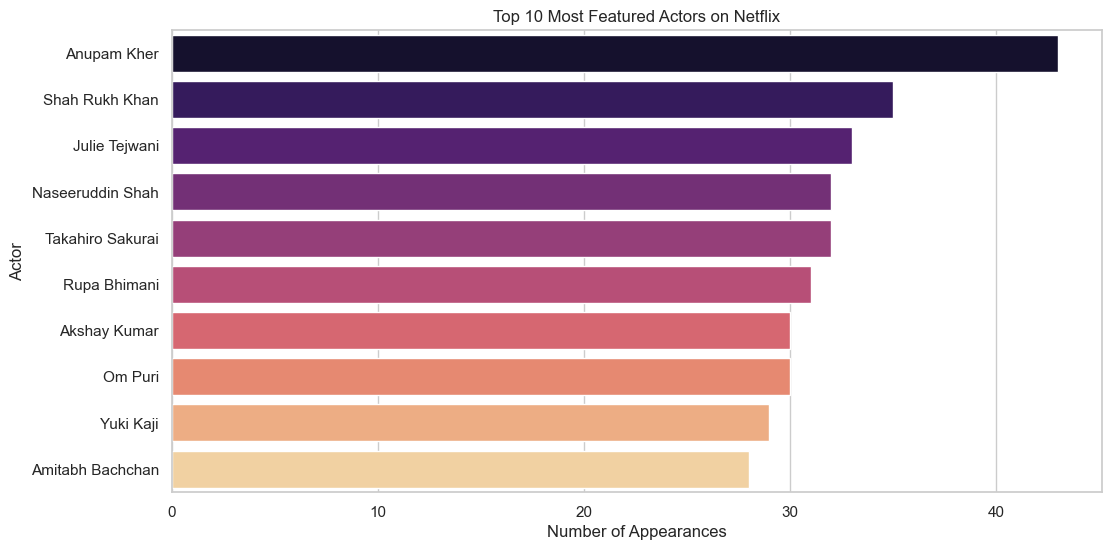

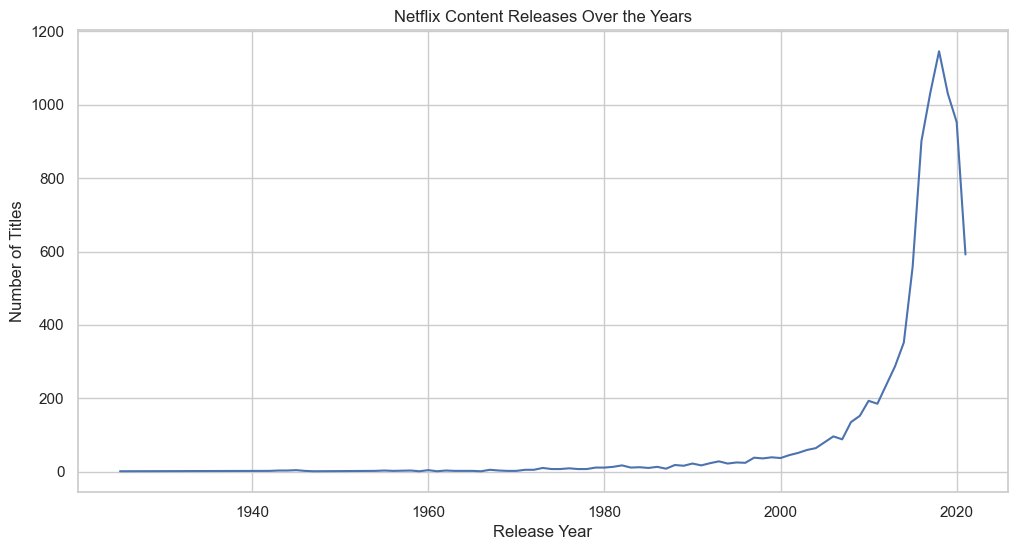

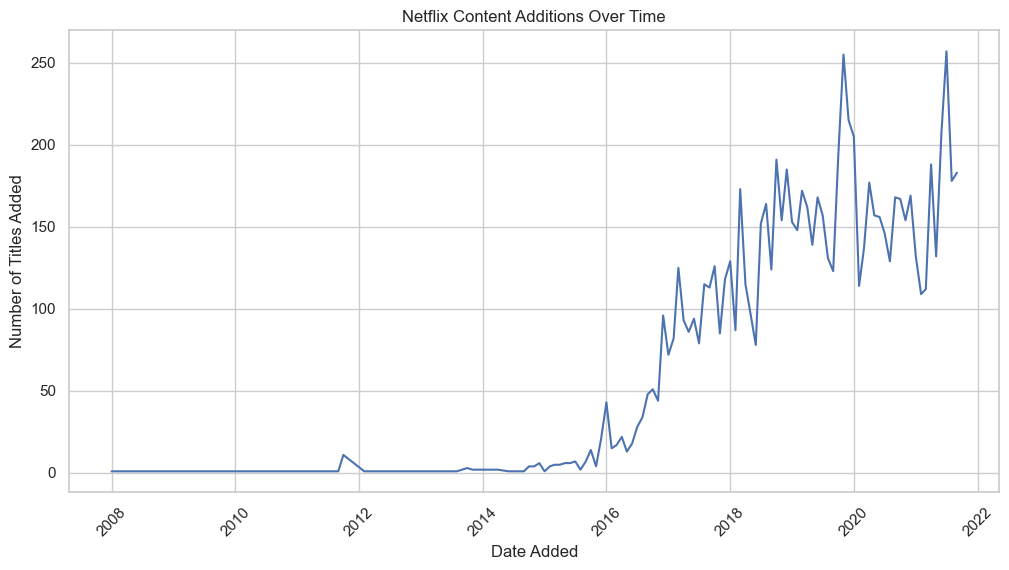

In [19]:
# Netflix Viewing Pattern Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Preview the data
print("Dataset shape:", df.shape)
print(df.head())

# Netflix Viewing Pattern Analysis

from collections import Counter

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# -----------------------
#  Data Cleaning
# -----------------------

# Handle missing values
df.dropna(subset=['title'], inplace=True)
df['director'].fillna("Not Available", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Not Available", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)

# Convert 'date_added' to datetime (handle whitespace & errors)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce', infer_datetime_format=True)

# Extract year and month for time series
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Convert release_year to numeric 
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Drop rows where year or month is missing (for time series analysis)
df.dropna(subset=['year_added', 'month_added'], inplace=True)

# -----------------------
# Exploratory Analysis
# -----------------------

# A. Count of Movies vs TV Shows
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# B. Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# C. Top 10 Genres
genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
genre_list = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(genre_list).most_common(10)
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# D. Top 10 Most Frequent Actors
cast_series = df[df['cast'] != 'Not Available']['cast'].apply(lambda x: [actor.strip() for actor in x.split(',')])
actor_list = [actor for sublist in cast_series for actor in sublist]
actor_counts = Counter(actor_list).most_common(10)
actor_df = pd.DataFrame(actor_counts, columns=['Actor', 'Count'])

sns.barplot(data=actor_df, x='Count', y='Actor', palette='magma')
plt.title('Top 10 Most Featured Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# E. Release Year Distribution
year_df = df['release_year'].value_counts().sort_index()
sns.lineplot(x=year_df.index, y=year_df.values)
plt.title('Netflix Content Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

# -----------------------
# Time Series of Content Additions
# -----------------------

# Group by year and month
monthly_additions = df.groupby(['year_added', 'month_added']).size().reset_index(name='Count')

# Convert to datetime with correctly renamed columns
monthly_additions['date'] = pd.to_datetime(
    monthly_additions.rename(columns={'year_added': 'year', 'month_added': 'month'})[['year', 'month']].assign(day=1),
    errors='coerce'
)

# Plot time series
sns.lineplot(data=monthly_additions, x='date', y='Count')
plt.title('Netflix Content Additions Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





In [13]:
# Insights we get from above analysis 